In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
matches = pd.read_csv("matches.csv", index_col=0)
matches

,team,date,time,round,day,venue,result,gf,ga,opponent,...,formation,referee,match_report,notes,sh,sot,dist,fk,pk,pkatt
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,...,4-3-3,Anthony Taylor,/en/matches/e62f6e78/Crystal-Palace-Arsenal-Au...,NaN,10,2,14.6,1,0,0
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,...,4-3-3,Darren England,/en/matches/7483b97f/Arsenal-Leicester-City-Au...,NaN,19,7,13.0,0,0,0
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,...,4-3-3,Craig Pawson,/en/matches/7f11dd9e/Bournemouth-Arsenal-Augus...,NaN,14,6,14.8,0,0,0
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,...,4-3-3,Jarred Gillett,/en/matches/8b69fd2d/Arsenal-Fulham-August-27-...,NaN,22,8,15.5,1,0,0
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,...,4-3-3,Robert Jones,/en/matches/cc235aad/Arsenal-Aston-Villa-Augus...,NaN,22,8,16.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,...,4-4-2,David Coote,/en/matches/21f920e0/Brighton-and-Hove-Albion-...,NaN,10,2,18.7,0,0,0
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,...,4-4-2,Stuart Attwell,/en/matches/217a7faf/Wolverhampton-Wanderers-A...,NaN,6,2,17.6,0,0,0
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,...,4-4-2,John Brooks,/en/matches/f5d61382/Manchester-United-Wolverh...,NaN,5,0,10.5,0,0,0
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,...,4-4-2,David Coote,/en/matches/ff2b58c3/Wolverhampton-Wanderers-E...,NaN,13,5,17.9,1,0,0


In [3]:
# matches=matches.drop('notes',axis=1)
matches=matches.iloc[:,:10]
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
# matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
# matches["day_code"] = matches["date"].dt.dayofweek
matches


,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,1,0,6
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,10
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,1,0,2
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,4
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,1
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,13
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,7


In [65]:
wdl={'W':3,'D':1,'L':0}
matches['points']=matches['result'].map(wdl)

In [71]:
def rolling_averages(group, cols, new_cols,window=3):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(window, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

cols = ["gf", "ga",'points']
new_cols = [f"{c}_rolling" for c in cols]

In [72]:
# # EXAMPLE
# grouped_matches = matches.groupby("team")
# group = grouped_matches.get_group("Manchester City").sort_values("date")
# rolling_averages(group, cols, new_cols)

,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code,points,gf_rolling,ga_rolling,points_rolling
459,Manchester City,2022-08-27,15:00:00,Matchweek 4,Sat,Home,W,4,2,Crystal Palace,1,1,6,3,3.000000,1.000000,2.333333
460,Manchester City,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,6,0,Nott'ham Forest,1,1,15,3,3.666667,1.666667,2.333333
461,Manchester City,2022-09-03,17:30:00,Matchweek 6,Sat,Away,D,1,1,Aston Villa,0,0,1,1,4.333333,1.666667,2.333333
462,Manchester City,2022-09-17,12:30:00,Matchweek 8,Sat,Away,W,3,0,Wolves,1,0,19,3,3.666667,1.000000,2.333333
463,Manchester City,2022-10-02,14:00:00,Matchweek 9,Sun,Home,W,6,3,Manchester Utd,1,1,13,3,3.333333,0.333333,2.333333
464,Manchester City,2022-10-08,15:00:00,Matchweek 10,Sat,Home,W,4,0,Southampton,1,1,16,3,3.333333,1.333333,2.333333
465,Manchester City,2022-10-16,16:30:00,Matchweek 11,Sun,Away,L,0,1,Liverpool,0,0,11,0,4.333333,1.000000,3.000000
466,Manchester City,2022-10-22,15:00:00,Matchweek 13,Sat,Home,W,3,1,Brighton,1,1,4,3,3.333333,1.333333,2.000000
467,Manchester City,2022-10-29,12:30:00,Matchweek 14,Sat,Away,W,1,0,Leicester City,1,0,10,3,2.333333,0.666667,2.000000
468,Manchester City,2022-11-05,15:00:00,Matchweek 15,Sat,Home,W,2,1,Fulham,1,1,8,3,1.333333,0.666667,2.000000


In [79]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling = matches_rolling.droplevel('team')
matches_rolling = matches_rolling.reset_index(drop=True)

matches_rolling = matches_rolling.drop('points',axis=1)
matches_rolling 

,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code,gf_rolling,ga_rolling,points_rolling
0,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8,3.000000,0.666667,3.000000
1,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1,3.000000,1.000000,3.000000
2,Arsenal,2022-09-04,16:30:00,Matchweek 6,Sun,Away,L,1,3,Manchester Utd,0,0,13,2.333333,0.666667,3.000000
3,Arsenal,2022-09-18,12:00:00,Matchweek 8,Sun,Away,W,3,0,Brentford,1,0,3,1.666667,1.666667,2.000000
4,Arsenal,2022-10-01,12:30:00,Matchweek 9,Sat,Home,W,3,1,Tottenham,1,1,17,2.000000,1.333333,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,4,1.666667,0.666667,2.000000
696,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,1,1.000000,2.666667,1.000000
697,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,13,1.000000,2.000000,2.000000
698,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,7,0.333333,2.666667,1.000000


In [4]:
ranked = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\ranked_mets_22223.csv", index_col=[0])
ranked

,goalie,defs,mids,atks,offdeff,intensity,dirspeed,deads,press,contra,buildup,progress,carr,wings,agresive,deferror,offsucc
Arsenal,0.55,0.900,0.800,0.950,1.00,0.80,0.10,0.10,0.95,0.45,0.85,0.90,0.20,0.15,0.70,0.15,0.85
Aston Villa,0.60,0.525,0.550,0.750,0.25,0.35,0.55,0.70,0.60,0.70,0.60,0.30,0.95,0.30,0.55,0.95,0.05
Bournemouth,0.35,0.200,0.150,0.575,0.10,0.15,0.50,0.90,0.05,0.50,0.30,0.05,0.85,0.90,0.05,0.70,0.15
Brentford,0.85,0.750,0.650,0.800,0.35,0.10,1.00,0.85,0.45,0.75,0.10,0.80,0.05,0.65,0.10,0.80,0.70
Brighton,0.10,0.700,0.950,0.350,0.80,0.85,0.25,0.20,0.90,0.90,0.90,0.70,0.30,0.20,0.50,0.50,0.75
Chelsea,0.75,0.525,0.500,0.100,0.75,0.90,0.15,0.25,0.85,0.40,0.95,0.35,0.65,0.40,0.90,0.45,0.30
Crystal Palace,0.50,0.850,0.225,0.700,0.40,0.45,0.80,0.75,0.35,0.35,0.40,0.55,0.45,0.80,1.00,0.60,0.40
Everton,0.90,0.100,0.300,0.050,0.50,0.20,0.75,0.80,0.25,0.60,0.15,0.20,0.55,0.95,0.80,0.30,0.10
Fulham,0.95,0.250,0.350,0.850,0.60,0.55,0.30,0.60,0.55,0.25,0.20,0.60,0.80,0.60,0.95,0.85,0.60
Leeds United,0.15,0.050,0.400,0.450,0.70,0.40,0.95,0.95,0.80,0.15,0.55,0.95,0.15,0.45,0.45,1.00,0.50


In [ ]:
matches=matches_rolling

In [86]:
full=matches.set_index('team').join(ranked).reset_index(drop=False,names='team')

In [87]:
full=full.set_index('opponent').join(ranked,rsuffix='_opo').reset_index(drop=False,names='opponent')

In [88]:
startcol=13+0
sc=startcol
rankedlen=17
rl=rankedlen

xcols=full.columns[sc:sc+rl]
xoppocols=full.columns[sc+rl:sc+rl+rl]
diff=full[xcols].values-full[xoppocols].values
xdiff=[x +'_diff' for x in xcols]
dfdiff=pd.DataFrame(diff,index=full[xcols].index,columns=xdiff)

full=full.join(dfdiff)
full

,opponent,team,date,time,round,day,venue,result,gf,ga,...,deads_diff,press_diff,contra_diff,buildup_diff,progress_diff,carr_diff,wings_diff,agresive_diff,deferror_diff,offsucc_diff
0,Arsenal,Aston Villa,2022-08-31,19:30:00,Matchweek 5,Wed,Away,L,1,2,...,0.60,-0.35,0.25,-0.25,-0.60,0.75,0.15,-0.15,0.80,-0.80
1,Arsenal,Aston Villa,2023-02-18,12:30:00,Matchweek 24,Sat,Home,L,2,4,...,0.60,-0.35,0.25,-0.25,-0.60,0.75,0.15,-0.15,0.80,-0.80
2,Arsenal,Bournemouth,2022-08-20,17:30:00,Matchweek 3,Sat,Home,L,0,3,...,0.80,-0.90,0.05,-0.55,-0.85,0.65,0.75,-0.65,0.55,-0.70
3,Arsenal,Bournemouth,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,2,3,...,0.80,-0.90,0.05,-0.55,-0.85,0.65,0.75,-0.65,0.55,-0.70
4,Arsenal,Brentford,2022-09-18,12:00:00,Matchweek 8,Sun,Home,L,0,3,...,0.75,-0.50,0.30,-0.75,-0.10,-0.15,0.50,-0.60,0.65,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,...,0.25,-0.10,0.20,0.10,-0.05,0.50,0.15,0.40,-0.15,0.20
756,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,...,-0.05,-0.30,0.85,0.30,-0.10,0.20,-0.20,0.15,-0.25,0.55
757,Wolves,Tottenham,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,0,1,...,-0.05,-0.30,0.85,0.30,-0.10,0.20,-0.20,0.15,-0.25,0.55
758,Wolves,West Ham,2022-10-01,17:30:00,Matchweek 9,Sat,Home,W,2,0,...,0.15,-0.40,-0.05,-0.10,0.35,0.25,0.30,0.10,-0.50,0.10


In [98]:
full.columns[11:13]

Index(['venue_code', 'opp_code'], dtype='object')

In [90]:
from_diff=list(full.columns[-rl:])+list(full.columns[11:13])

In [91]:
from_ranked=list(full.columns[11:])
from_ranked=from_diff

In [92]:
from sklearn.model_selection import train_test_split
# predictors = ["venue_code", "opp_code", "hour", "day_code"]
X_train, X_test, y_train, y_test = train_test_split(full[from_ranked], full['target'], test_size=0.3, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [94]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [96]:
preds = rf.predict(X_test)

In [97]:
# befroe rolling 0.6622807017543859
error = accuracy_score(y_test, preds)
error

0.6622807017543859

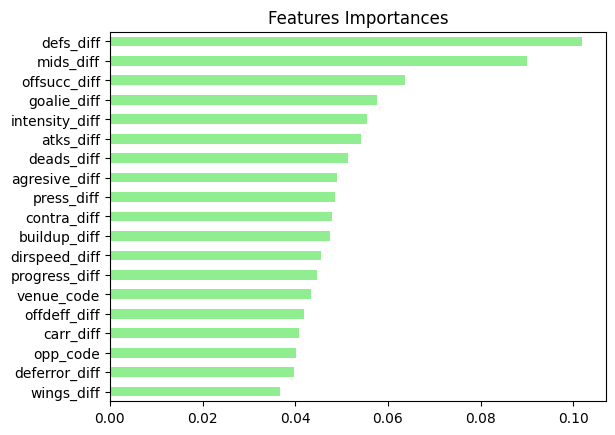

In [42]:
cols=full[from_ranked].columns
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= cols)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [43]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict and print the label for the new data point X_new
y_pred = knn.predict(X_test)


c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_f

In [44]:
#  Print the accuracy
print(knn.score(X_test, y_test))

#evaluating model

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6491228070175439
[[111  23]
 [ 57  37]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.74       134
           1       0.62      0.39      0.48        94

    accuracy                           0.65       228
   macro avg       0.64      0.61      0.61       228
weighted avg       0.64      0.65      0.63       228



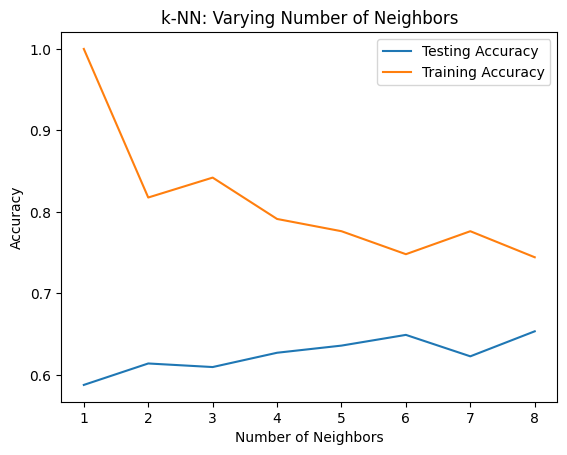

In [45]:
#how many neighbours
import numpy as np
import matplotlib.pyplot as plt
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Logistic Regression
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# Import the necessary modules
from sklearn.linear_model import LogisticRegression


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
lreg = pipeline.fit(X_train, y_train)


# Compute and print metrics
print(lreg.score(X_test, y_test))

# Predict the labels of the test set: y_pred
y_pred = lreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# befroe rolling 0.7236842105263158
# [[110  24]
#  [ 39  55]]


0.7236842105263158
[[110  24]
 [ 39  55]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       134
           1       0.70      0.59      0.64        94

    accuracy                           0.72       228
   macro avg       0.72      0.70      0.71       228
weighted avg       0.72      0.72      0.72       228



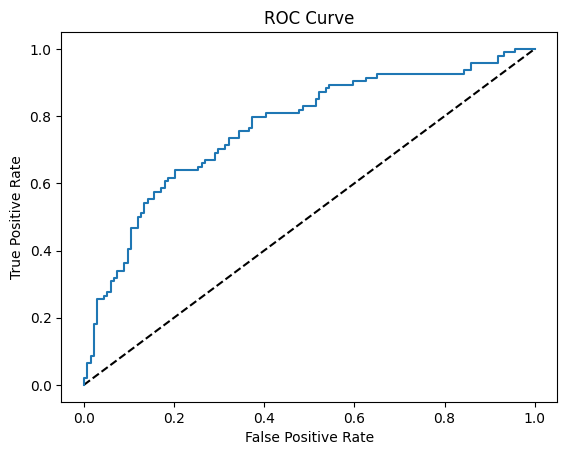

In [47]:
#ROC curve
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
# GridSearch

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'lreg__C': c_space}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7412280701754386
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       134
           1       0.72      0.61      0.66        94

    accuracy                           0.74       228
   macro avg       0.74      0.72      0.73       228
weighted avg       0.74      0.74      0.74       228

Tuned Model Parameters: {'lreg__C': 3.727593720314938}


In [49]:
#CART - Classification and Regression Trees 
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1, criterion='entropy') #, criterion='gini'

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(y_test, y_pred))

Test set accuracy: 0.62
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       134
           1       0.55      0.44      0.49        94

    accuracy                           0.62       228
   macro avg       0.60      0.59      0.59       228
weighted avg       0.61      0.62      0.61       228



In [50]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]



In [51]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.667


In [52]:
# 50 drzew z rozna bootsrapowana data glosuje -> tworzy sie 50 tych samych modeli dopasowanych do innej kombincji danych
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

print(classification_report(y_test, y_pred))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.658, OOB accuracy: 0.667
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       134
           1       0.59      0.54      0.57        94

    accuracy                           0.66       228
   macro avg       0.65      0.64      0.64       228
weighted avg       0.65      0.66      0.66       228



In [53]:
from sklearn.metrics import roc_auc_score
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC score: 0.69


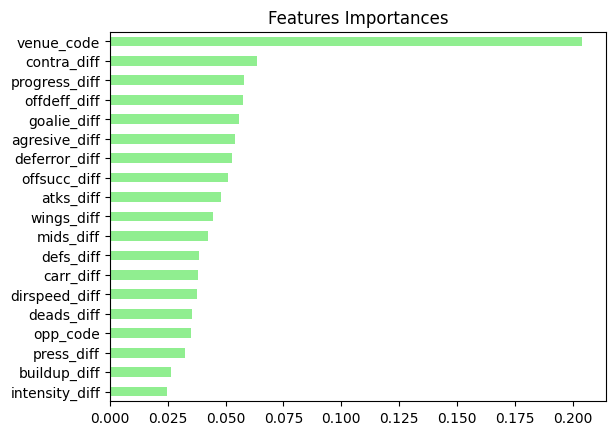

In [54]:
cols=full[from_ranked].columns
# Create a pd.Series of features importances
importances = pd.Series(data=ada.feature_importances_, index= cols)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

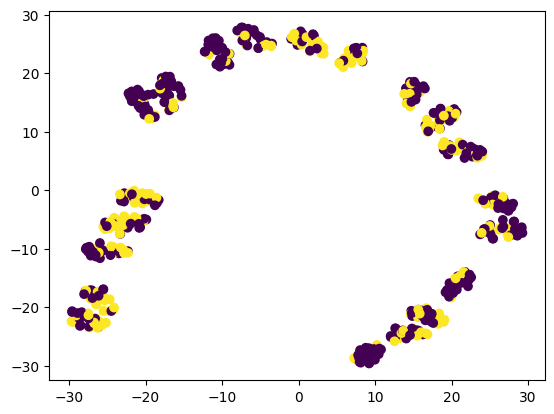

In [55]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_train)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()

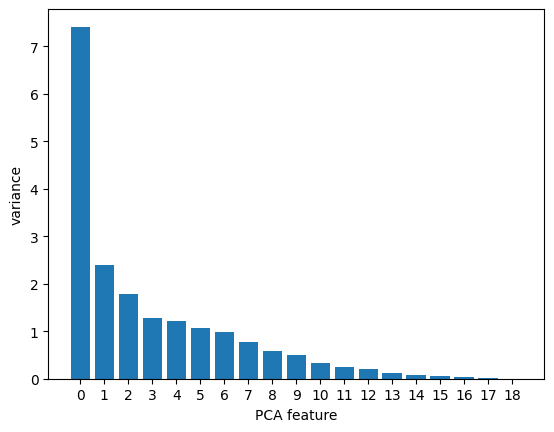

In [56]:
    # how many intrinsic dimensions

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [57]:
    # how many intrinsic dimensions you have to set n_components - idealy to intrinsic dimention

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(X_train)

# Print the shape of pca_features
print(X_train.shape)
print(pca_features.shape)

# This information is included in the pca attribute: components_. As described in the documentation, 
# pca.components_ outputs an array of [n_components, n_features], 
# so to get how components are linearly related with the different features you have to:
#wychodzi na to ze PC sa skorelowane z kazdym feature i sa ich oszacowaniem, wiec nie wiadomo z ktorego zrezygnowac

feature_names=full[from_ranked].columns
# Dump components relations with features:
pd.DataFrame(pca.components_,columns=feature_names,index = ['PC1','PC2','PC3'])


(532, 19)
(532, 3)


,goalie_diff,defs_diff,mids_diff,atks_diff,offdeff_diff,intensity_diff,dirspeed_diff,deads_diff,press_diff,contra_diff,buildup_diff,progress_diff,carr_diff,wings_diff,agresive_diff,deferror_diff,offsucc_diff,venue_code,opp_code
PC1,0.050311,0.262040,0.328575,0.107893,0.294889,0.322017,-0.202696,-0.318672,0.290416,0.200905,0.307277,0.121184,-0.197646,-0.268908,-0.015711,-0.185936,0.304711,0.012114,0.053942
PC2,0.332815,0.064532,0.093867,-0.145501,0.201910,-0.194508,0.419685,0.183121,0.135773,0.041922,-0.244049,0.503797,-0.394207,0.228981,0.037597,-0.002761,0.151040,-0.014270,0.031398
PC3,0.255837,-0.110400,-0.139953,-0.436646,0.243879,0.133665,-0.193850,-0.151271,0.131285,-0.247638,0.035487,0.041114,0.208157,0.138027,0.536637,-0.288029,-0.182727,-0.003514,-0.161479


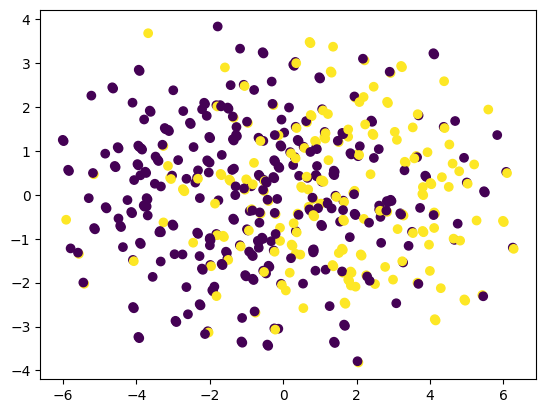

In [58]:
# Select the 0th feature: xs
xs = pca_features[:,0]

# Select the 1st feature: ys
ys = pca_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()